In [56]:
import pandas as pd
import numpy as np
import seaborn as sns

In [90]:
df = pd.read_csv('train.csv')

In [81]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,1,2,"Bell, Adele",female,62.00,0,0,PC 15008,14.86,D17243,C
99996,99996,0,2,"Brown, Herman",male,66.00,0,0,13273,11.15,NaN,S
99997,99997,0,3,"Childress, Charles",male,37.00,0,0,NaN,9.95,NaN,S
99998,99998,0,3,"Caughlin, Thomas",male,51.00,0,1,458654,30.92,NaN,S


# Task 3

In [59]:
df['Sex'].value_counts()

male      56114
female    43886
Name: Sex, dtype: int64

In [60]:
df['Survived'].value_counts()

0    57226
1    42774
Name: Survived, dtype: int64

In [61]:
df[df['Survived'] == 1]['Sex'].value_counts()

female    31226
male      11548
Name: Sex, dtype: int64

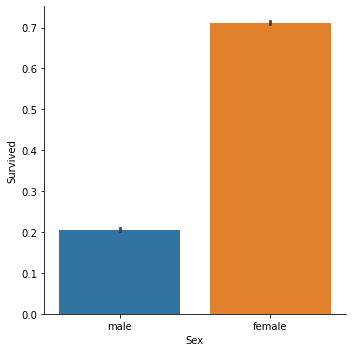

In [62]:
sns.catplot(data=df, kind="bar", x="Sex", y="Survived")

# Большинство выживших женского пола, несмотря на то что мужчин на корабле больше

In [12]:
df['Age'].median()

39.0

In [13]:
df['Age'].mean()

38.35547214294576

In [14]:
df[df['Survived'] == 1]['Age'].median()

43.0

In [15]:
df[df['Survived'] == 1]['Age'].mean()

40.55379931430776

In [16]:
df[df['Survived'] == 0]['Age'].median()

36.0

In [17]:
df[df['Survived'] == 0]['Age'].mean()

36.708694881533724

'Показано распределение возраста пассажиров. Самый высокий процент выживаемости для старых людей. \nСамый низкий - для людей 20-40 лет'

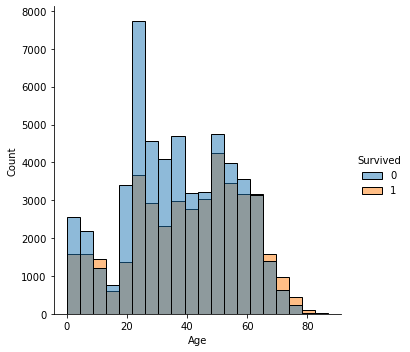

In [18]:
sns.displot(data=df, x='Age', kind='hist', bins=20, hue='Survived')
'''Показано распределение возраста пассажиров. Самый высокий процент выживаемости для старых людей. 
Самый низкий - для людей 20-40 лет'''

# Class and Embarked

In [21]:
df[df['Survived'] == 1]['Pclass'].value_counts() 

1    17576
2    15057
3    10141
Name: Pclass, dtype: int64

In [22]:
df[df['Survived'] == 0]['Pclass'].value_counts() 

3    30865
2    13622
1    12739
Name: Pclass, dtype: int64

'показан процент выживших для каждого из классов.\nМожно сделать вывод, что в 1-ом классе процент выживших выше'

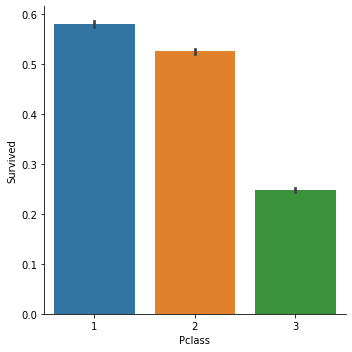

In [24]:
sns.catplot(data=df, kind="bar", x="Pclass", y="Survived")
'''показан процент выживших для каждого из классов.
Можно сделать вывод, что в 1-ом классе процент выживших выше. Во 2-ом почти такой же. В 3-ем гораздо хуже'''

In [25]:
df[df['Survived'] == 1]['Embarked'].value_counts() 

S    22745
C    16669
Q     3238
Name: Embarked, dtype: int64

In [26]:
df[df['Survived'] == 0]['Embarked'].value_counts() 

S    49394
C     5518
Q     2186
Name: Embarked, dtype: int64

'показан процент выживших для каждого из классов.\nМожно сделать вывод, что в 1-ом классе процент выживших выше. Во 2-ом почти такой же. В 3-ем гораздо хуже'

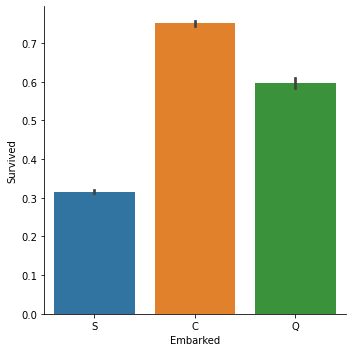

In [27]:
sns.catplot(data=df, kind="bar", x="Embarked", y="Survived")
'''показан процент выживших для Embarked.
Можно сделать вывод, что в C процент выживших выше. В Q чуть меньше. В S гораздо хуже'''

In [45]:
df.isna().mean()
'''Процент пропущенных данных в каждом столбце'''

PassengerId    0.00000
Survived       0.00000
Pclass         0.00000
Name           0.00000
Sex            0.00000
Age            0.03292
SibSp          0.00000
Parch          0.00000
Ticket         0.04623
Fare           0.00134
Cabin          0.67866
Embarked       0.00250
dtype: float64

In [103]:
values = {"Age": df['Age'].mean(), "Fare": df['Fare'].mean(), "Embarked": 'C'}
df[['Age', 'Fare', 'Embarked']] = df[['Age', 'Fare', 'Embarked']].fillna(value=values)
# df[num_cols].fillna(df.mean())

In [104]:
df.isna().mean()

PassengerId    0.00000
Survived       0.00000
Pclass         0.00000
Name           0.00000
Sex            0.00000
Age            0.00000
SibSp          0.00000
Parch          0.00000
Ticket         0.04623
Fare           0.00000
Cabin          0.67866
Embarked       0.00000
dtype: float64

In [105]:
num_cols = [
    'Age',
    'Fare',
    'Pclass',
    'SibSp',
    'Parch'
]

cat_cols = [
    'Sex',
    'Embarked'
]

target_col = 'Survived'

train_cols = num_cols + ['Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S']

cols = num_cols + cat_cols + [target_col]

In [106]:
df = df[cols]

In [107]:
df = pd.get_dummies(df, columns=cat_cols)

In [108]:
df.head()

,Age,Fare,Pclass,SibSp,Parch,Survived,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,38.355472,27.14,1,2,0,1,0,1,0,0,1
1,38.355472,13.35,3,0,0,0,0,1,0,0,1
2,0.330000,71.29,3,1,2,0,0,1,0,0,1
3,19.000000,13.04,3,0,0,0,0,1,0,0,1
4,25.000000,7.76,3,0,0,1,0,1,0,0,1


In [109]:
from sklearn.model_selection import train_test_split

In [114]:
X_train, X_test, y_train, y_test = train_test_split(df[train_cols], df['Survived'], test_size = 0.2)

In [115]:
from sklearn.linear_model import LogisticRegression

In [116]:
clf = LogisticRegression(C=1)
clf.fit(X_train, y_train)
y_pred = clf.predict(y_test)

C:\Users\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


ValueError: Expected 2D array, got 1D array instead:
array=[1 0 0 ... 0 0 0].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

In [117]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

clf = KNeighborsClassifier()

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.72915

In [121]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm

In [ ]:
# Кросс-валидация. Долго обучается
from sklearn.model_selection import cross_val_score
clf = svm.SVC(kernel='linear', C=1, random_state=42)
scores = cross_val_score(clf, df[train_cols], df['Survived'], cv=5)
scores

In [ ]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

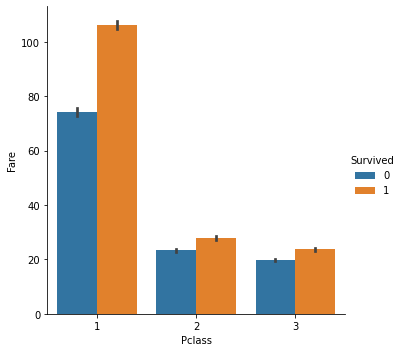

In [18]:
sns.catplot(data=df, kind="bar", x="Pclass", y="Fare", hue="Survived")
'''показаны средняя цена билета для каждого класса, а также процент выживших для каждого из классов.
Можно сделать вывод, что в 1-ом классе билеты дороже и процент выживших выше'''

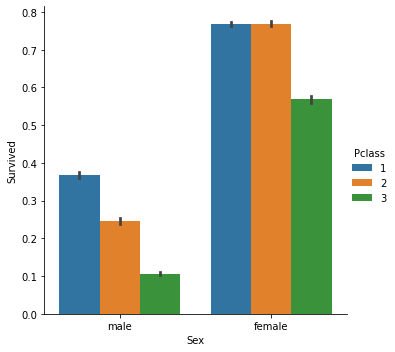

In [23]:
sns.catplot(data=df, kind="bar", x="Sex", y="Survived", hue='Pclass')
'''Показана зависимость выживаемости от пола, а затем от класса.
Вывод: женщины выживали чаще. Причём для них класс не играл высокой роли. 
А для мужчин класс был очень важным фактором. '''

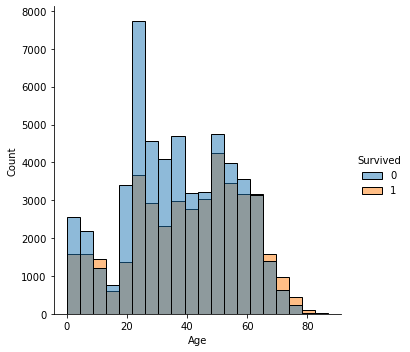

In [26]:
sns.displot(data=df, x='Age', kind='hist', bins=20, hue='Survived')
'''Показано распределение возраста пассажиров. Самый высокий процент выживаемости для старых людей. 
Самый низкий - для людей 20-40 лет'''

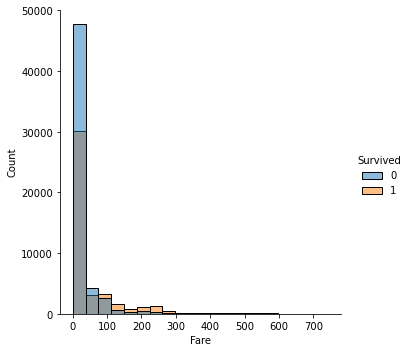

In [34]:
sns.displot(data=df, x='Fare', kind='hist', bins=20, hue='Survived')
'''распределение стоимости билетов. Среди тех, кто заплатил больше, процент выживших существенно выше'''